<h1 style="font-size:50px; color:white; background-color:#2c3e50; text-align:center; padding:30px; border-radius:15px;">
Sentiment Analysis on Amazon Reviews 🛒💬
</h1>


<div style="display: flex; align-items: center; padding: 15px; background: linear-gradient(90deg, #6DD5FA, #1FA2FF, #38EF7D); border-left: 7px solid #38EF7D; border-radius: 8px; margin: 20px 0; width: 70%;">
    <h1 style="color: white; font-family: 'Verdana', sans-serif; font-size: 24px; margin: 0;">
        1 | About the Dataset And Load dataset
    </h1>
</div>

v>
div>
iv>
iv>


<h2 style="background-color:#1abc9c; color:white; padding:12px; border-radius:10px;">📦 Dataset Overview: Amazon Consumer Reviews</h2>

<p style="font-size:16px;">
This dataset contains over <strong>568,000 consumer reviews</strong> on various Amazon products. It is ideal for performing <strong>sentiment analysis</strong> and understanding customer behavior.
</p>

<h3 style="color:#34495e;">🔍 Dataset Details</h3>

<ul style="font-size:16px;">
  <li><strong>Total Records:</strong> 568,454</li>
  <li><strong>Total Columns:</strong> 10</li>
  <li><strong>Domain Name:</strong> amazon.com</li>
  <li><strong>File Extension:</strong> CSV</li>
</ul>

<h3 style="color:#34495e;">🧾 Available Fields</h3>

<ul style="font-size:16px;">
  <li><strong>Id:</strong> Unique review identifier</li>
  <li><strong>ProductId:</strong> Product identifier</li>
  <li><strong>UserId:</strong> User identifier</li>
  <li><strong>ProfileName:</strong> Reviewer’s profile name</li>
  <li><strong>HelpfulnessNumerator:</strong> Number of helpful votes</li>
  <li><strong>HelpfulnessDenominator:</strong> Total number of votes</li>
  <li><strong>Score:</strong> Rating score (1 to 5)</li>
  <li><strong>Time:</strong> Timestamp of the review</li>
  <li><strong>Summary:</strong> Short title/summary of the review</li>
  <li><strong>Text:</strong> Full text of the review</li>
</ul>

<h3 style="color:#34495e;">🎯 Purpose of the Dataset</h3>

<ul style="font-size:16px;">
  <li>Sentiment Analysis: Classify reviews into positive or negative sentiments.</li>
  <li>Text Mining: Extract patterns and insights from review texts.</li>
  <li>Customer Behavior Analysis: Understand how users rate and review over time.</li>
</ul>

<h2 style="background-color:#9b59b6; color:white; padding:12px; border-radius:10px;">🛠️ Tools and Libraries Used</h2>

<p style="font-size:16px;">
The following Python libraries and tools were used throughout the project:
</p>

<ul style="font-size:16px;">
  <li><strong>Pandas:</strong> Data manipulation and cleaning</li>
  <li><strong>NumPy:</strong> Numerical computations</li>
  <li><strong>NLTK:</strong> Natural Language Processing (tokenization, stemming)</li>
  <li><strong>Pandarallel:</strong> Parallel processing to speed up data transformation</li>
  <li><strong>Scikit-learn:</strong> Machine Learning models and pipelines</li>
  <li><strong>Matplotlib / Seaborn:</strong> Data visualization</li>
</ul>

<h2 style="background-color:#e67e22; color:white; padding:12px; border-radius:10px;">💡 How We Used the Dataset</h2>

<ul style="font-size:16px;">
  <li>Preprocessed the review text (cleaning, tokenizing, stemming)</li>
  <li>Added a <strong>polarity_score</strong> using TextBlob for sentiment intensity</li>
  <li>Trained a <strong>Logistic Regression</strong> model using a custom <strong>Pipeline</strong></li>
  <li>Compared predicted sentiment with actual review scores</li>
  <li>Visualized results and performance metrics</li>
</ul>

<p style="font-size:16px;">
This project demonstrates the full cycle of a real-world NLP task from raw data to modeling and evaluation.
</p>


<div style="background-color:#FAD02E;padding:10px;border-radius:10px;">
  <h2>📚 Part 1: Importing Required Libraries</h2>
</div>

This section is responsible for importing all the libraries used in the project.


INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


[nltk_data] Downloading package omw-1.4 to C:\Users\IT
[nltk_data]     SHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\IT
[nltk_data]     SHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


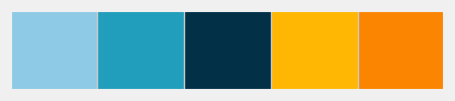

In [1]:
import warnings
warnings.filterwarnings('ignore')
#import re

# data munapltion
import pandas as pd
from pandarallel import pandarallel
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

# NLP preprocessing
from bs4 import BeautifulSoup
pandarallel.initialize(progress_bar=True)
import string
string.punctuation
import nltk
# Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
nltk.download('omw-1.4')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer

#from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
#from yellowbrick.text import FreqDistVisualizer

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
#from sklearn import set_config
from sklearn.preprocessing import StandardScaler

# LR
from sklearn.linear_model import LogisticRegression
# Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,roc_auc_score
# encoder
from sklearn.feature_extraction.text import CountVectorizer
# prepare styles and colors for plots
style.use("fivethirtyeight")
colors = ["#8ecae6", "#219ebc", "#023047", "#ffb703", "#fb8500"]
palette = sns.color_palette(colors)
sns.palplot(sns.color_palette(colors))
plt.show()
style.use("fivethirtyeight")



<div style="background-color:#A3D2CA;padding:10px;border-radius:10px;">
  <h2>📂 Part 2: Data Loading & Initial Exploration</h2>
</div>

This part covers reading the dataset and displaying basic info like shape, columns, and sample data.


In [2]:
df = pd.read_csv(r'C:\Users\IT SHOP\Downloads\Telegram Desktop\Amazon Customer Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [6]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


<div style="display: flex; align-items: center; padding: 15px; background: linear-gradient(90deg, #6DD5FA, #1FA2FF, #38EF7D); border-left: 7px solid #38EF7D; border-radius: 8px; margin: 20px 0; width: 70%;">
    <h1 style="color: white; font-family: 'Verdana', sans-serif; font-size: 24px; margin: 0;">
          Analyzing text statistics
    </h1>
</div>

This Step include:
* Word frequency analysis,
* Sentence length analysis,
* Average word length analysis    #########################################

   

### Number of characters present in each Text (Review)   
---
 ranging the number of characters by 500 chars and so on.

In [7]:
text_len = df['Text'].groupby(pd.cut(df['Text'].str.len(), np.arange(0, 20000+500, 500))).count().rename_axis(['Range']).reset_index()
text_len.head(20)

,Range,Text
0,"(0, 500]",414827
1,"(500, 1000]",110333
2,"(1000, 1500]",27062
3,"(1500, 2000]",9059
4,"(2000, 2500]",3443
5,"(2500, 3000]",1556
6,"(3000, 3500]",960
7,"(3500, 4000]",346
8,"(4000, 4500]",260
9,"(4500, 5000]",310


In [8]:
text_len_50 = text_len[text_len['Text'] > 50]
text_len_50

,Range,Text
0,"(0, 500]",414827
1,"(500, 1000]",110333
2,"(1000, 1500]",27062
3,"(1500, 2000]",9059
4,"(2000, 2500]",3443
5,"(2500, 3000]",1556
6,"(3000, 3500]",960
7,"(3500, 4000]",346
8,"(4000, 4500]",260
9,"(4500, 5000]",310


<Axes: xlabel='Text', ylabel='Count'>

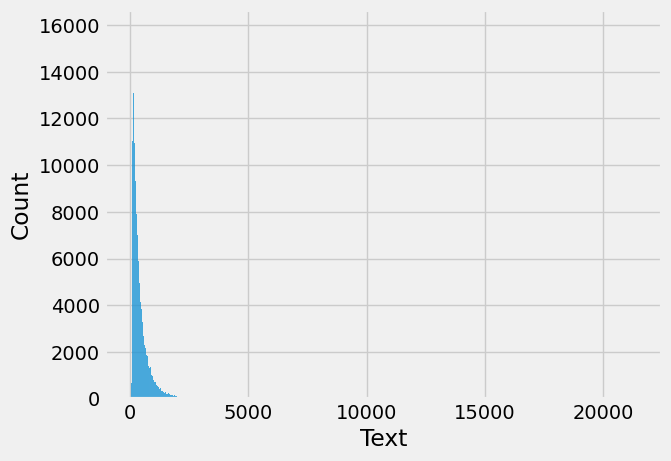

In [10]:
sns.histplot(data=df, x=df['Text'].str.len(),palette=palette)

### Number of characters present in each Summary
---

<Axes: xlabel='Summary', ylabel='Count'>

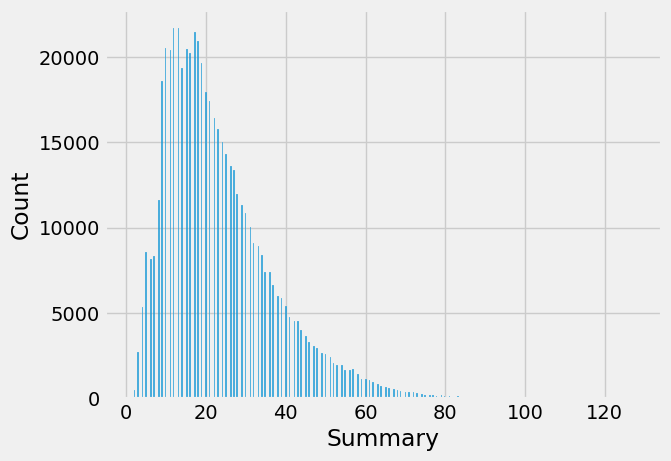

In [11]:
sns.histplot(data=df, x=df['Summary'].str.len(),palette=palette)


<div style="display: flex; align-items: center; padding: 15px; background: linear-gradient(90deg, #6DD5FA, #1FA2FF, #38EF7D); border-left: 7px solid #38EF7D; border-radius: 8px; margin: 20px 0; width: 70%;">
    <h1 style="color: white; font-family: 'Verdana', sans-serif; font-size: 24px; margin: 0;">
         Analyzing Numrical statistics
    </h1>
</div>

### Bar Chart Plot for Distribution of Rating
---

### Sentiment distribuation depand on Score values
---

In [62]:
df['Sentiment_Score'] = df['Score'].apply(lambda x: 1 if x >=3 else 0)

<Axes: xlabel='Sentiment_Score', ylabel='count'>

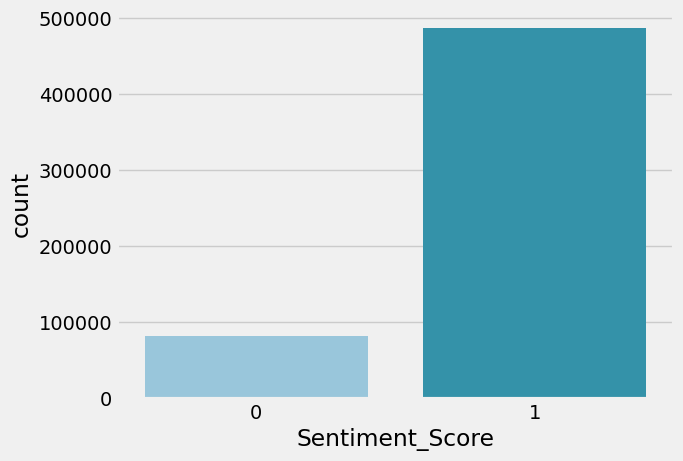

In [14]:
sns.countplot(data=df,x='Sentiment_Score', palette=palette)

<div style="background-color:#FFB6B9;padding:10px;border-radius:10px;">
  <h2>🧹 Part 3: Data Cleaning & Preprocessing</h2>
</div>

This part handles null values, duplicates, and prepares the data for analysis.


In [15]:
# Check for missing values in each column
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
Sentiment_Score            0
dtype: int64

There are missing values in several columns, but if there are not many, I drop null values.

In [16]:
df.dropna(inplace=True)

## Duplicated Values
---

In [17]:
df.duplicated().sum()

np.int64(0)

<div style="display: flex; align-items: center; padding: 15px; background: linear-gradient(90deg, #6DD5FA, #1FA2FF, #38EF7D); border-left: 7px solid #38EF7D; border-radius: 8px; margin: 20px 0; width: 70%;">
    <h1 style="color: white; font-family: 'Verdana', sans-serif; font-size: 24px; margin: 0;">
          Clean the Data
    </h1>
</div>




* HTML Tag removal
* Punctuation Removal
* Lowering the text
* Tokenization
* Stop word removal
* Stemming

In [18]:
df['Full_Text'] = df['Summary'] + ' ' + df['Text']

## Clean HTML
-----

In [20]:
def clean_html(html):
    from bs4 import BeautifulSoup
    # parse html content
    soup = BeautifulSoup(html, "html.parser")

    for data in soup(['style', 'script', 'code', 'a']):
        # Remove tags
        data.decompose()

    # return data by retrieving the tag content
    return ' '.join(soup.stripped_strings)

df['Full_Text_HTML'] = df['Full_Text'].parallel_apply(clean_html) #function is typically used in the context of data processing to apply a function to a DataFrame or Series in parallel, speeding up the computation by utilizing multiple CPU cores.

## Punctuation Removal :
----

In [21]:
def remove_punctuation(text):
    import string
    string.punctuation
    punctuation ="".join([i for i in text if i not in string.punctuation])
    return punctuation
#storing the puntuation free text
df['clean_review']= df['Full_Text_HTML'].parallel_apply(remove_punctuation)

## Lowering the text
---

In [22]:
df['lower_review'] = df['Full_Text_HTML'].parallel_apply(lambda x: x.lower()) # without punctuation removal 


## Stop word removal
---

In [34]:
stopwords = nltk.corpus.stopwords.words('english')
nltk.download('omw-1.4')
def remove_stopwords(text):
    import nltk
    
    stopwords = nltk.corpus.stopwords.words('english')
    nltk.download('omw-1.4')
    text = text.split()
    useless_words = nltk.corpus.stopwords.words("english")
    useless_words = useless_words + ['hi', 'im']
    text_filtered = [word for word in text if not word in useless_words]
    final_string = ' '.join(text_filtered)
    return final_string
df['no_stopwords']= df['lower_review'].parallel_apply(remove_stopwords)

[nltk_data] Downloading package omw-1.4 to C:\Users\IT
[nltk_data]     SHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<div style="background-color:#B5EAD7;padding:10px;border-radius:10px;">
  <h2>✂️ Part 4: Text Preprocessing (Tokenization & Stemming)</h2>
</div>

In this part, we clean the text by tokenizing and stemming it using NLP tools like NLTK.


## Tokenization 

**Tokenization** is a process in Natural Language Processing (NLP) that involves separating a piece of text into smaller units called **tokens**. These tokens can be of different types depending on the context and the purpose of the analysis:

- **Words**: The most common type of token, where each token represents a single word. For example, the sentence "I love NLP" would be tokenized into the words: `["I", "love", "NLP"]`.
- **Characters**: In some cases, tokenization can also be done at the character level. For example, the word "love" would be tokenized into characters: `["l", "o", "v", "e"]`.
- **Subwords**: Some advanced tokenization methods, such as Byte Pair Encoding (BPE), divide words into smaller subword units, which is useful for handling out-of-vocabulary words or complex words. For instance, "unhappiness" might be tokenized into `["un", "happine
  
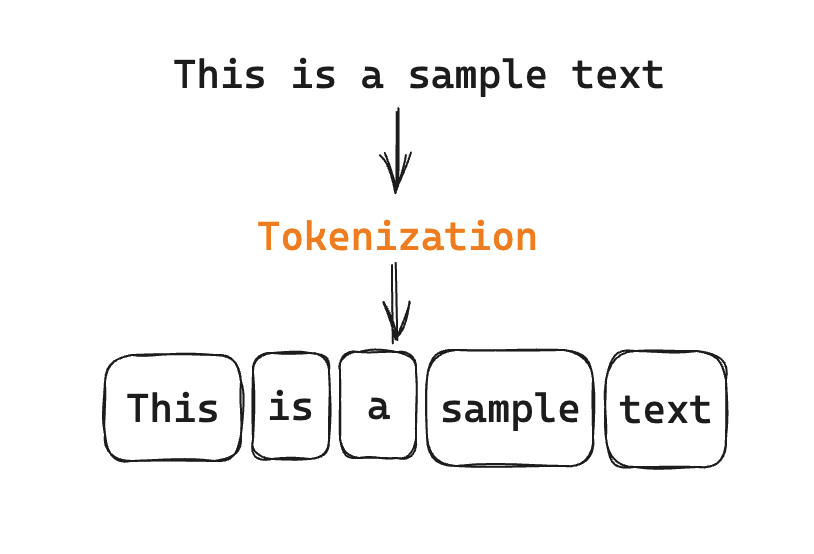sontent.


In [38]:
import nltk
df['review_tokenied']= df['no_stopwords'].parallel_apply(nltk.word_tokenize)

## Stemming 

Stemming is a fundamental task in Natural Language Processing (NLP). It involves reducing the inflected form of a word to its root form, often referred to as a "stem" or "lemma" in linguistics. 

### Porter Stemming Algorithm

The **Porter Stemming Algorithm** is one of the most widely used stemming algorithms in NLP. Compared to other stemmers, such as the **Lovins Stemmer**, the Porter stemmer uses a more mathematical approach to stemming.

- **How it works**: The algorithm classifies every character in a given word as either a consonant (denoted as `c`) or a vowel (denoted as `v`). 
- These consonant and vowel characters are then grouped together as `C` and `V`, respectively.
- Once the word is represented as a sequence of consonant and vowel groups, the stemmer applies a set of predefined rules to remove certain suffixes based on the number of `C` and `V` groups in the word.

### Rule-Based Process

- The algorithm uses a list of rules that specify which suffixes to remove, depending on the number of vowel-consonant groups in the word.
- Since the English language follows general lexical patterns, but not absolute rules, this systematic criterion used by the Porter stemmer can sometimes lead to errors.

The Porter stemmer provides a fast, efficient way to reduce words to their base form, making it an essential tool for various NLP tasks like text classification, sentiment analysis, and informat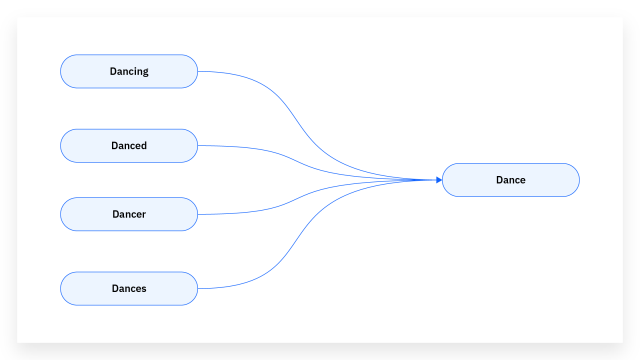4-ef6994f05d8b.png)

In [46]:
from nltk.stem.porter import PorterStemmer
def stemming(text):
    from nltk.stem.porter import PorterStemmer
    porter_stemmer = PorterStemmer()
    stem_text = [porter_stemmer.stem(word) for word in text]
    final_string = ' '.join(stem_text)
    
    return final_string
    
df['review_stemmed']= df['review_tokenied'].parallel_apply(stemming)

<div style="background-color:#FFDAC1;padding:10px;border-radius:10px;">
  <h2>🧠 Part 6: Feature Engineering (Polarity Score)</h2>
</div>

This part involves calculating sentiment polarity for each review using `TextBlob`.


## Rule-Based with Polarity 

Polarity refers to the degree of positivity or negativity in a given text. In NLP, polarity analysis is used to determine the sentiment of a text, whether it is positive, negative, or neutral. This can be done using a variety of techniques such as rule-based methods, machine learning algorithms, or deep learning models.

### Calculation of Polarity
Polarity is typically measured as a numeric value ranging from -1 to 1:
- **-1**: Fully negative sentiment
- **0**: Neutral sentiment
- **1**: Fully positive sentiment

For example:
- The sentence *"I love this product, it's amazing!"* might have a polarity score of **0.9** (positive sentiment).
- The sentence *"This is the worst thing I've ever bought."* might have a polarity score of **-0.8** (negative sentiment).

### Rule-Based Methods
Rule-based methods typically involve defining a set of rules or patterns that identify certain words or phrases that carry a positive or negative connotation. For example:
- **Positive Words**: "happy," "great," "awesome"
- **Negative Words**: "sad," "terrible," "awful"

The polarity is calculated by summing the scores of all positive (predefined lexicons) and negative words in a given text, considering their context.

#### Example:
Text: *"The movie was great, but the ending was terrible."*
- Positive word: "great" (+0.8)
- Negative word: "terrible" (-0.7)

Polarity Score = +0.8 + (-0.7) = **+0.1** (slightly positive sentiment)

These methods provide a quick and simple way to analyze sentiment but may lack the sophistication to handle context or nuanced language.
anguage.
ve.

In [47]:
def polarity(text):
    from textblob import TextBlob
    return TextBlob(text).sentiment.polarity

df['polarity_score'] = df['review_stemmed'].parallel_apply( polarity)


In [48]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment_Score,Full_Text,Full_Text_HTML,clean_review,lower_review,no_stopwords,review_tokenied,review_stemmed,polarity_score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,Good Quality Dog Food I have bought several of...,Good Quality Dog Food I have bought several of...,Good Quality Dog Food I have bought several of...,good quality dog food i have bought several of...,good quality dog food bought several vitality ...,"[good, quality, dog, food, bought, several, vi...",good qualiti dog food bought sever vital can d...,0.500000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,Not as Advertised Product arrived labeled as J...,Not as Advertised Product arrived labeled as J...,Not as Advertised Product arrived labeled as J...,not as advertised product arrived labeled as j...,advertised product arrived labeled jumbo salte...,"[advertised, product, arrived, labeled, jumbo,...",advertis product arriv label jumbo salt peanut...,0.083333
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,"""Delight"" says it all This is a confection tha...","""Delight"" says it all This is a confection tha...",Delight says it all This is a confection that ...,"""delight"" says it all this is a confection tha...","""delight"" says confection around centuries. li...","[``, delight, '', says, confection, around, ce...",`` delight '' say confect around centuri . lig...,0.387500
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0,Cough Medicine If you are looking for the secr...,Cough Medicine If you are looking for the secr...,Cough Medicine If you are looking for the secr...,cough medicine if you are looking for the secr...,cough medicine looking secret ingredient robit...,"[cough, medicine, looking, secret, ingredient,...",cough medicin look secret ingredi robitussin b...,0.150000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1,Great taffy Great taffy at a great price. The...,Great taffy Great taffy at a great price. The...,Great taffy Great taffy at a great price Ther...,great taffy great taffy at a great price. the...,great taffy great taffy great price. wide asso...,"[great, taffy, great, taffy, great, price, ., ...",great taffi great taffi great price . wide ass...,0.526667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,1,Will not do without Great for sesame chicken.....,Will not do without Great for sesame chicken.....,Will not do without Great for sesame chickenth...,will not do without great for sesame chicken.....,without great sesame chicken..this good better...,"[without, great, sesame, chicken, .., this, go...",without great sesam chicken .. thi good better...,0.380000
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,0,disappointed I'm disappointed with the flavor....,disappointed I'm disappointed with the flavor....,disappointed Im disappointed with the flavor T...,disappointed i'm disappointed with the flavor....,disappointed disappointed flavor. chocolate no...,"[disappointed, disappointed, flavor, ., chocol...",disappoint disappoint flavor . chocol note esp...,-0.081250
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1,Perfect for our maltipoo These stars are s

In [ ]:
sns.histplot(x=df['polarity_score'])

In [49]:
def sentiment(x):
    if x < 0:
        return 'neg'
    elif x == 0:
        return 'neu'
    else:
        return 'pos'
    
df['polarity']= df['polarity_score'].parallel_apply(sentiment)
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment_Score,Full_Text,Full_Text_HTML,clean_review,lower_review,no_stopwords,review_tokenied,review_stemmed,polarity_score,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,Good Quality Dog Food I have bought several of...,Good Quality Dog Food I have bought several of...,Good Quality Dog Food I have bought several of...,good quality dog food i have bought several of...,good quality dog food bought several vitality ...,"[good, quality, dog, food, bought, several, vi...",good qualiti dog food bought sever vital can d...,0.500000,pos
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,Not as Advertised Product arrived labeled as J...,Not as Advertised Product arrived labeled as J...,Not as Advertised Product arrived labeled as J...,not as advertised product arrived labeled as j...,advertised product arrived labeled jumbo salte...,"[advertised, product, arrived, labeled, jumbo,...",advertis product arriv label jumbo salt peanut...,0.083333,pos
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,"""Delight"" says it all This is a confection tha...","""Delight"" says it all This is a confection tha...",Delight says it all This is a confection that ...,"""delight"" says it all this is a confection tha...","""delight"" says confection around centuries. li...","[``, delight, '', says, confection, around, ce...",`` delight '' say confect around centuri . lig...,0.387500,pos
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0,Cough Medicine If you are looking for the secr...,Cough Medicine If you are looking for the secr...,Cough Medicine If you are looking for the secr...,cough medicine if you are looking for the secr...,cough medicine looking secret ingredient robit...,"[cough, medicine, looking, secret, ingredient,...",cough medicin look secret ingredi robitussin b...,0.150000,pos
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1,Great taffy Great taffy at a great price. The...,Great taffy Great taffy at a great price. The...,Great taffy Great taffy at a great price Ther...,great taffy great taffy at a great price. the...,great taffy great taffy great price. wide asso...,"[great, taffy, great, taffy, great, price, ., ...",great taffi great taffi great price . wide ass...,0.526667,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,1,Will not do without Great for sesame chicken.....,Will not do without Great for sesame chicken.....,Will not do without Great for sesame chickenth...,will not do without great for sesame chicken.....,without great sesame chicken..this good better...,"[without, great, sesame, chicken, .., this, go...",without great sesam chicken .. thi good better...,0.380000,pos
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,0,disappointed I'm disappointed with the flavor....,disappointed I'm disappointed with the flavor....,disappointed Im disappointed with the flavor T...,disappointed i'm disappointed with the flavor....,disappointed disappointed flavor. chocolate no...,"[disappointed, disappointed, flavor, ., chocol...",disappoint disappoint flavor . chocol note esp...,-0.081250,neg
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1,P

<Axes: xlabel='polarity', ylabel='count'>

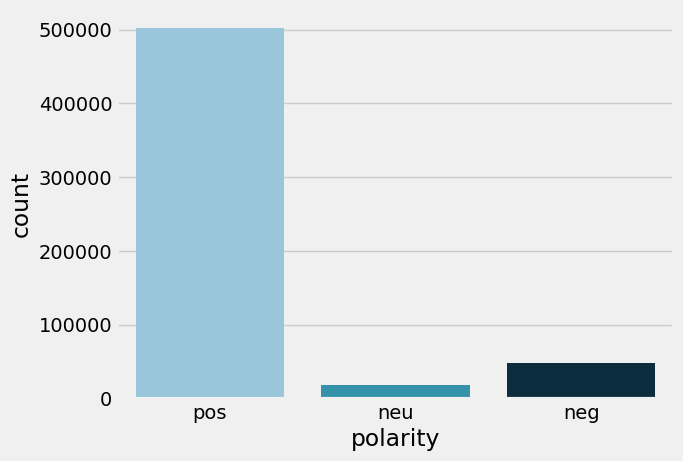

In [50]:
sns.countplot(x=df['polarity'],palette=palette)

In [51]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "Neutral"
    elif(pol>0 and pol<=0.3):
        return "Weakly Positive"
    elif(pol>0.3 and pol<=0.6):
        return "Positive"
    elif(pol>0.6 and pol<=1):
        return "Strongly Positive"
    elif(pol>-0.3 and pol<=0):
        return "Weakly Negative"
    elif(pol>-0.6 and pol<=-0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return "Strongly Negative"
    
df['polarity_2'] = df['Text'].apply(get_polarity)

In [52]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,Full_Text,Full_Text_HTML,clean_review,lower_review,no_stopwords,review_tokenied,review_stemmed,polarity_score,polarity,polarity_2
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,...,Good Quality Dog Food I have bought several of...,Good Quality Dog Food I have bought several of...,Good Quality Dog Food I have bought several of...,good quality dog food i have bought several of...,good quality dog food bought several vitality ...,"[good, quality, dog, food, bought, several, vi...",good qualiti dog food bought sever vital can d...,0.500000,pos,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,...,Not as Advertised Product arrived labeled as J...,Not as Advertised Product arrived labeled as J...,Not as Advertised Product arrived labeled as J...,not as advertised product arrived labeled as j...,advertised product arrived labeled jumbo salte...,"[advertised, product, arrived, labeled, jumbo,...",advertis product arriv label jumbo salt peanut...,0.083333,pos,Weakly Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,...,"""Delight"" says it all This is a confection tha...","""Delight"" says it all This is a confection tha...",Delight says it all This is a confection that ...,"""delight"" says it all this is a confection tha...","""delight"" says confection around centuries. li...","[``, delight, '', says, confection, around, ce...",`` delight '' say confect around centuri . lig...,0.387500,pos,Weakly Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,...,Cough Medicine If you are looking for the secr...,Cough Medicine If you are looking for the secr...,Cough Medicine If you are looking for the secr...,cough medicine if you are looking for the secr...,cough medicine looking secret ingredient robit...,"[cough, medicine, looking, secret, ingredient,...",cough medicin look secret ingredi robitussin b...,0.150000,pos,Weakly Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,...,Great taffy Great taffy at a great price. The...,Great taffy Great taffy at a great price. The...,Great taffy Great taffy at a great price Ther...,great taffy great taffy at a great price. the...,great taffy great taffy great price. wide asso...,"[great, taffy, great, taffy, great, price, ., ...",great taffi great taffi great price . wide ass...,0.526667,pos,Positive


## VADER Sentiment Analysis

### Overview
In finance and trading, news and economic updates significantly impact stock prices. Automating sentiment analysis of news can provide better trading opportunities. This guide explains VADER sentiment analysis and its application in algorithmic trading.

---

### What is VADER?
- **VADER** stands for **Valence Aware Dictionary for sEntiment Reasoning**.
- It is a **rule-based sentiment analysis model** that consumes fewer resources compared to machine learning models.
- VADER decodes emotions in **text, audio, or video** using predefined rules and a sentiment dictionary.

---

### What is Valence Score?

A **Valence Score** is a score assigned to words based on sentiment, ranging from **-4 to +4**:
- **Negative Sentiment**: Words like "terrible" (-3.2), "horrible" (-2.5)
- **Positive Sentiment**: Words like "great" (+3.1), "good" (+1.9)
- **Neutral Sentiment**: Words near a valence score of **0** (e.g., "okay").

---

### How Does VADER Calculate Valence Score for Sentences?

VADER uses **five heuristics** to adjust the sentiment intensity of sentences:

1. **Punctuation**: 
   - Exclamation marks (!) amplify sentiment intensity.
   - Example: "It’s hot!!!" > "It’s hot."

2. **Capitalization**: 
   - Words in **ALL-CAPS** increase the intensity.
   - Example: "It’s HOT." > "It’s hot."

3. **Degree Modifiers**: 
   - Words like "extremely" or "slightly" adjust the intensity of sentiment.
   - Example: "extremely hot" increases intensity, while "slightly hot" reduces it.

4. **Polarity Shifts**: 
   - Conjunctions like **"but"** signal a shift in sentiment direction.
   - Example: "It’s hot, but bearable." The sentiment after "but" becomes dominant.

5. **Negation Handling**: 
   - Detects negations like "not" to reverse the sentiment polarity.
   - Example: "It isn’t hot" flips the sentiment to negative.
ith indicators like **Simple Moving Averages (SMA)** to create trade signals.


In [60]:
sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    # Polarity score returns dictionary
    import numpy as np
    import nltk
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    nltk.download('vader_lexicon')
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(sent)
    return np.argmax(list(ss.values())[:-1])

df['sid_polarity']= df['review_stemmed'].parallel_apply( get_vader_score)
df['sid_polarity'].replace({0:'neg',1:'neu',2:'pos'})


0         neu
1         neu
2         neu
3         neu
4         pos
         ... 
568449    neu
568450    neu
568451    neu
568452    pos
568453    neu
Name: sid_polarity, Length: 568401, dtype: object

In [ ]:
df.tail()

<Axes: xlabel='sid_polarity', ylabel='count'>

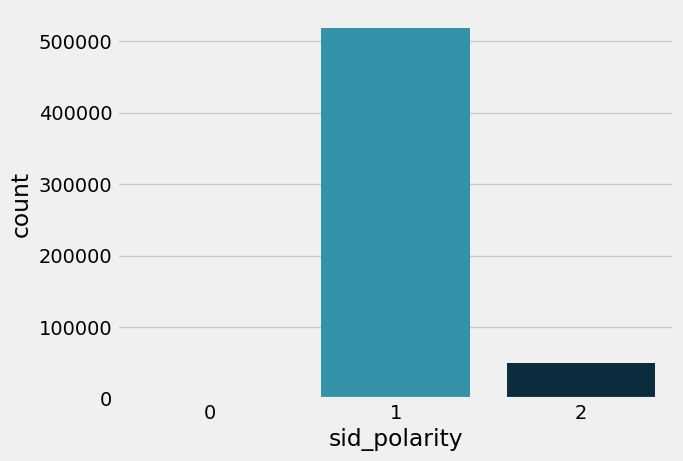

In [63]:
sns.countplot(x=df['sid_polarity'],palette=palette)

<div style="display: flex; align-items: center; padding: 15px; background: linear-gradient(90deg, #6DD5FA, #1FA2FF, #38EF7D); border-left: 7px solid #38EF7D; border-radius: 8px; margin: 20px 0; width: 70%;">
    <h1 style="color: white; font-family: 'Verdana', sans-serif; font-size: 24px; margin: 0;">
         Machine Learning
    </h1>
</div>




<div style="background-color:#D5AAFF;padding:10px;border-radius:10px;">
  <h2>🔀 Part 7: Train/Test Split</h2>
</div>

We split the dataset into training and testing subsets for model training and evaluation.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

<div style="background-color:#B8F2E6;padding:10px;border-radius:10px;">
  <h2>🧪 Part 8: Building the Machine Learning Pipeline</h2>
</div>

Create an end-to-end pipeline with vectorization, TF-IDF, scaling, and classification.


In [ ]:
set_config(display="diagram")
pipe  # click on the diagram below to see the details of each step


In [64]:
X = df[['review_stemmed', 'polarity_score']]  
y = df['Score'].values  

# Train/test split

# Define a simple pipeline with text vectorization and numeric scaling
pipe = Pipeline([
    ('vec', CountVectorizer(stop_words="english")),  # Convert text to word vectors
    ('tfidf', TfidfTransformer()),  # Apply TF-IDF transformation
    ('scaler', StandardScaler(with_mean=False)),  # Scale numeric features
    ('classifier', LogisticRegression())  # Use Logistic Regression for classification
])

# Fit the model on the training data
pipe.fit(X_train['review_stemmed'], y_train)

# Predict the labels on the test set
y_pred = pipe.predict(X_test['review_stemmed'])

# Print the accuracies
print('Training accuracy:', pipe.score(X_train['review_stemmed'], y_train))
print('Test accuracy:', pipe.score(X_test['review_stemmed'], y_test))


Training accuracy: 0.852911681914145
Test accuracy: 0.7466067328753265


<div style="background-color:#D0E6A5;padding:10px;border-radius:10px;">
  <h2>📌 Part 9: Comparing Predictions with Actual Scores</h2>
</div>

Compare model predictions with the actual review scores and check for matches.


In [66]:
import pandas as pd

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Add column to check if they match
comparison_df['Match'] = comparison_df['Actual'] == comparison_df['Predicted']

# Show first 10 rows
print(comparison_df.head(10))

# Count how many matched
print("Total Matches:", comparison_df['Match'].sum())
print("Total Mismatches:", (~comparison_df['Match']).sum())
print("Match Percentage:", round(comparison_df['Match'].mean() * 100, 2), "%")


   Actual  Predicted  Match
0       5          5   True
1       4          1  False
2       1          1   True
3       5          5   True
4       5          5   True
5       3          3   True
6       5          4  False
7       4          5  False
8       5          5   True
9       5          5   True
Total Matches: 84875
Total Mismatches: 28806
Match Percentage: 74.66 %


<div style="background-color:#FF9AA2;padding:10px;border-radius:10px;">
  <h2>📉 Part 10: Visualizing Model Performance</h2>
</div>

Visualize how the model performed using bar charts and heatmaps.


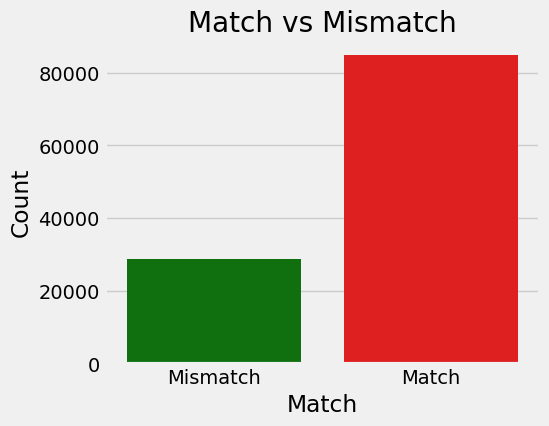

In [67]:
match_counts = comparison_df['Match'].value_counts()
plt.figure(figsize=(5,4))
sns.barplot(x=match_counts.index, y=match_counts.values, palette=['green', 'red'])
plt.xticks([0,1], ['Mismatch', 'Match'])
plt.title('Match vs Mismatch')
plt.ylabel('Count')
plt.show()


<div style="background-color:#e3f2fd;padding:15px;border-radius:10px;">
  <h2>🏁 Final Conclusion: Insights & Reflections</h2>
</div>

The completion of this project marks a significant step in applying real-world **Natural Language Processing (NLP)** and **Machine Learning** techniques to a large-scale dataset. By analyzing over half a million consumer reviews from Amazon, we successfully built an end-to-end sentiment analysis pipeline capable of understanding and classifying customer emotions from raw textual data.

### ✅ What We Achieved:
- Explored and understood the structure of a massive review dataset.
- Applied thorough **data cleaning** and **preprocessing** techniques, including tokenization and stemming.
- Extracted sentiment polarity using `TextBlob`, enhancing the feature set.
- Built a robust **ML pipeline** integrating vectorization (CountVectorizer + TF-IDF), scaling, and classification using **Logistic Regression**.
- Evaluated model performance using accuracy metrics and visualizations.
- Compared predicted sentiment with actual scores for validation and analysis.

### 🔍 Key Learnings:
- Preprocessing textual data is crucial for achieving accurate sentiment classification.
- Pipelines help streamline the ML workflow, ensuring consistency and scalability.
- Parallelization can significantly improve performance when working with large datasets.
- Visualizations and comparisons add clarity and depth to the analysis.

### 🚀 Future Improvements:
- Incorporate deep learning models such as LSTM or BERT for better performance.
- Expand analysis to multilingual reviews or other e-commerce platforms.
- Perform aspect-based sentiment analysis to extract specific product features mentioned in reviews.

### 💡 Final Thought:
In a digital world overflowing with consumer feedback, understanding sentiment is not just a luxury—it’s a necessity. This project stands as a solid foundation for future NLP endeavors and showcases the potential of data science to extract actionable insights from unstructured text.

> *"Data is the new oil, and sentiment is its scent."* 🧠✨
